# Synthetic dataset generation and visualization
This notebook provides the code and visualizations for the synthetic dataset

In [61]:
import matplotlib.pyplot as plt
from tslearn.metrics import dtw_path
import numpy as np
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#### RANDOM PATH Generation

In [62]:
# Creating equally spaced 100 data in range 0 to 2*pi
num = 100
theta = np.linspace(0, np.pi, num )
#theta2 = np.linspace(np.pi, 2*np.pi, num )
theta2 = np.linspace(2*np.pi, np.pi, num )
#theta2 = np.linspace(0, np.pi, num )

noise1 = np.random.normal(loc=0.0, scale=0.1, size=num)
noise2 = np.random.normal(loc=0.0, scale=0.1, size=num )

# Generating x and y data
x1 = 16 * ( np.sin(theta) ** 3 ) + noise1 
y1 = 13 * np.cos(theta) - 5* np.cos(2*theta) - 2 * np.cos(3*theta) - np.cos(4*theta) + noise1


x2 = 16 * ( np.sin(theta2) ** 3 ) + noise2 
y2 = 13 * np.cos(theta2) - 5* np.cos(2*theta2) - 2 * np.cos(3*theta2) - np.cos(4*theta2) + noise2 

## Rotation of heart in 2D space 
theta1 = 5*np.pi/180 # 5
R1 = np.array([[np.cos(theta1), -np.sin(theta1)], [np.sin(theta1), np.cos(theta1)]])

theta2 = 40*np.pi/180 # 40
R2 = np.array([[np.cos(theta2), -np.sin(theta2)], [np.sin(theta2), np.cos(theta2)]])

v1_rot = R1 @ np.array([x1, y1])
x1 = v1_rot[0,:]
y1 = v1_rot[1,:]

v2_rot = R2 @ np.array([x2, y2])
x2 = v2_rot[0,:]
y2 = v2_rot[1,:]

In [69]:
def random_rotate(input, theta_min= 30, theta_max = 45):
    theta_grad = np.random.uniform(low=theta_min, high=theta_max, size=1)
    theta = theta_grad[0]*np.pi/180
    #print(theta.shape)
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

    #np.array([[np.cos(theta2), -np.sin(theta2)], [np.sin(theta2), np.cos(theta2)]])
    output =  R @ input
    return output

def random_scale(input, min_factor= 0.5, max_factor= 1.5):
    scales = np.random.uniform(low=min_factor, high=max_factor, size=2)
    M_scale = np.diag(scales) 
    output = M_scale @ input
    return output

def random_translation(input, min = -10, max = 10):
        translation = np.random.uniform(low=min, high=max, size=2)
        M_trans = np.eye(3) 
        M_trans[0,-1] = translation[0]
        M_trans[1,-1] = translation[1]
        out = M_trans @ np.concatenate((input, np.ones((1, input.shape[-1]))), axis = 0)
        return out[0:-1,:]

def random_temporal_scaling(input, min_scale = 0.2, max_scale = 0.8):
    num = input.shape[-1]
    scale_factor = np.random.uniform(low=min_scale, high=max_scale, size=1)
    x_rescaled = np.interp(np.linspace(0, num-1, int(num*scale_factor)), np.arange(num), input[0])
    y_rescaled = np.interp(np.linspace(0, num-1, int(num*scale_factor)), np.arange(num), input[1])

    pad_left = np.random.randint(0, high=num-len(x_rescaled), dtype=int)
    pad_right = num-len(x_rescaled)-pad_left
    x_rescaled_pad = np.pad(x_rescaled, (pad_left, pad_right), mode='edge').reshape(1,-1)
    y_rescaled_pad = np.pad(y_rescaled, (pad_left, pad_right), mode='edge').reshape(1,-1)
    #print(x_rescaled.shape)
    #print(y_rescaled.shape)
    #print(x1_rescaled_pad.shape)
    out = np.concatenate([x_rescaled_pad, y_rescaled_pad])
    #print(out.shape)
    return out

def generate_random_paths(orig_path1, orig_path2, number_paths=100):
    all_paths = []
    all_paths.append(orig_path1)
    all_paths.append(orig_path2)

    for i in range(number_paths):
        new_path1 = random_temporal_scaling(random_translation(random_scale(random_rotate(orig_path1))))
        new_path2 = random_temporal_scaling(random_translation(random_scale(random_rotate(orig_path2))))
        all_paths.append(new_path1)
        all_paths.append(new_path2)

    return np.array(all_paths)

def show_all_paths(paths):
    # show all paths
    fig, ax = plt.subplots(figsize=(3.5, 3.5))
    for i in range(paths.shape[0]):
        # Using set_dashes() to modify dashing of an existing line
        #line1, = ax.plot(x, y, label='Using set_dashes()')
        #ax.plot(ts[i,0,:], ts[i,1,:], label=f'sample {i}',  marker='.')
        ax.plot(paths[i,0,:], paths[i,1,:], label=f'sample {i}',  marker='.', alpha = 0.9, color = 'lightgray')
    #ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    #plt.savefig('./figures/all_heart_paths.png', bbox_inches='tight')  
    plt.show()

# Creating equally spaced 100 data in range 0 to 2*pi
num = 100
theta = np.linspace(0, np.pi, num )
#theta2 = np.linspace(np.pi, 2*np.pi, num )
theta2 = np.linspace(2*np.pi, np.pi, num)
#theta2 = np.linspace(0, np.pi, num )

noise1 = np.random.normal(loc=0.0, scale=0.1, size=num)
noise2 = np.random.normal(loc=0.0, scale=0.1, size=num)

# Generating x and y data
x1 = 16 * ( np.sin(theta) ** 3 ) + noise1 
y1 = 13 * np.cos(theta) - 5* np.cos(2*theta) - 2 * np.cos(3*theta) - np.cos(4*theta) + noise1

x2 = 16 * ( np.sin(theta2) ** 3 ) + noise2 
y2 = 13 * np.cos(theta2) - 5* np.cos(2*theta2) - 2 * np.cos(3*theta2) - np.cos(4*theta2) + noise2 
        
path1 = np.array([x1, y1])
path2 = np.array([x2, y2])
random_augmented_paths = generate_random_paths(path1, path2, number_paths=800)
np.save(r'./dataset/synthetic_data.npy', random_augmented_paths)

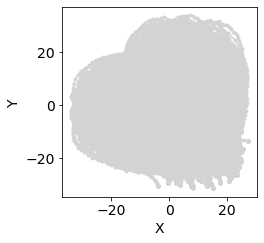

(1602, 2, 100)

In [70]:
paths = random_augmented_paths
show_all_paths(random_augmented_paths)
paths.shape


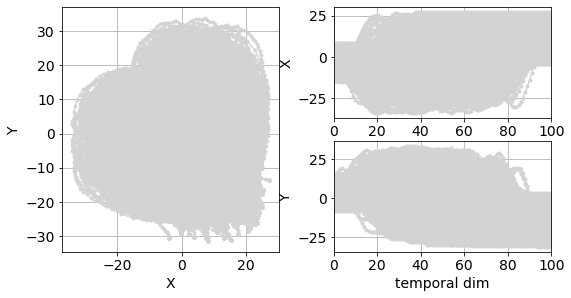

In [71]:
fig, axs = plt.subplots(2 , 2, figsize = (8,4))
gs = axs[0, 1].get_gridspec()
# remove the underlying axes
for ax in axs[0:, 0]:
    ax.remove()
axbig = fig.add_subplot(gs[0:, 0])
#axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
 #              xycoords='axes fraction', va='center')
for i in range(paths.shape[0]):
    axbig.plot(paths[i,0,:], paths[i,1,:], label=f'sample {i}',  marker='.', alpha = 0.9, color = 'lightgray')
    axs[0,1].plot(np.arange(0,paths.shape[-1],1), paths[i,0,:], marker='.', color = 'lightgray')
    axs[1,1].plot(np.arange(0,paths.shape[-1],1), paths[i,1,:], marker='.', color = 'lightgray')
axbig.set_xlabel('X')
axbig.set_ylabel('Y')
axbig.grid()
#axbig.legend()

#axs[0,1].set_xlabel('temporal dim')
axs[0,1].set_ylabel('X')
axs[0,1].grid()
axs[0,1].set_xlim([0,100])

#axs[0,1].set_xlabel('temporal dim')
axs[1,1].set_ylabel('Y')
axs[1,1].grid()
axs[1,1].set_xlabel('temporal dim')
axs[1,1].set_xlim([0,100])

# set the spacing between subplots
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.2)

#### Visualizations of 2D paths and DTW vs Eucledian distance

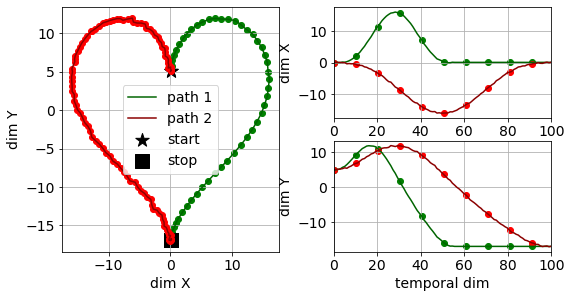

In [68]:
# Randomly rescale x1 and y1 in the temporal domain
scale_factor = np.random.uniform(low=0.3, high=1, size=1)
x1_rescaled = np.interp(np.linspace(0, num-1, int(num*scale_factor)), np.arange(num), x1)
y1_rescaled = np.interp(np.linspace(0, num-1, int(num*scale_factor)), np.arange(num), y1)

#print(x1_rescaled.shape)
#print(y1_rescaled.shape)
x1_rescaled = np.interp(np.linspace(0, num-1, int(num*scale_factor)), np.arange(num), x1)
y1_rescaled = np.interp(np.linspace(0, num-1, int(num*scale_factor)), np.arange(num), y1)
# Pad the sequence to the original length with the initial value and the last value of the sequence
pad_left = np.random.randint(0, high=num-len(x1_rescaled), dtype=int)
#pad_y_left = np.random.randint(0, high=num-len(y1_rescaled), dtype=int)
#pad_x_right = num-len(x1_rescaled)-pad_x_left
pad_right = num-len(y1_rescaled)-pad_left

#print(num)
#print(x1_rescaled.shape[0] + pad_left + pad_right )

x1_rescaled = np.pad(x1_rescaled, (pad_left, pad_right), mode='edge')
y1_rescaled = np.pad(y1_rescaled, (pad_left, pad_right), mode='edge')

x1 = x1_rescaled
y1 = y1_rescaled


fig, axs = plt.subplots(2 , 2, figsize = (8,4))
gs = axs[0, 1].get_gridspec()
# remove the underlying axes
for ax in axs[0:, 0]:
    ax.remove()
axbig = fig.add_subplot(gs[0:, 0])
#axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
 #              xycoords='axes fraction', va='center')
axbig.scatter(x1,y1, color = 'green')
axbig.plot( x1, y1, color = 'darkgreen', label = 'path 1' )
axbig.plot( x2,y2,'o', color = 'red')
axbig.plot( x2, y2, color = 'darkred', label = 'path 2')
# Start and stop 
s = 200
axbig.scatter(x1[0],y1[0], color = 'black', label = 'start', marker= "*", s=s)
axbig.scatter(x2[0],y2[0], color = 'black',  marker= "*", s =s)
axbig.scatter(x1[-1],y1[-1], color = 'black', label = 'stop', marker= "s", s=s)
axbig.scatter(x2[-1],y2[-1], color = 'black',  marker= "s", s=s)

axbig.set_xlabel('dim X')
axbig.set_ylabel('dim Y')
axbig.grid()
axbig.legend()


axs[0,1].scatter(np.linspace(0,num, num)[0::10], x1[0::10], color = 'green',)
axs[0,1].plot(np.linspace(0,num, num), x1, color = 'darkgreen', label = 'path 2' )
axs[0,1].scatter(np.linspace(0,num, num)[0::10], x2[0::10], color = 'red')
axs[0,1].plot(np.linspace(0,num, num), x2, color = 'darkred', label = 'path 2' )

#axs[0,1].set_xlabel('temporal dim')
axs[0,1].set_ylabel('dim X')
axs[0,1].grid()
axs[0,1].set_xlim([0,100])

axs[1,1].scatter(np.linspace(0,num, num)[0::10], y1[0::10], color = 'green')
axs[1,1].plot(np.linspace(0,num, num), y1, color = 'darkgreen', label = 'path 2' )
axs[1,1].scatter(np.linspace(0,num, num)[0::10], y2[0::10], color = 'red')
axs[1,1].plot(np.linspace(0,num, num), y2, color = 'darkred', label = 'path 2' )
#axs[0,1].set_xlabel('temporal dim')
axs[1,1].set_ylabel('dim Y')
axs[1,1].grid()
axs[1,1].set_xlabel('temporal dim')
axs[1,1].set_xlim([0,100])


# set the spacing between subplots
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.2)
plt.savefig('./figures/2d_path_temporal_no_rotation.png', bbox_inches='tight', transparent=False)  

idx 708
Eucledian distance 136.70606926742806
DTW similarity 131.25876790314157


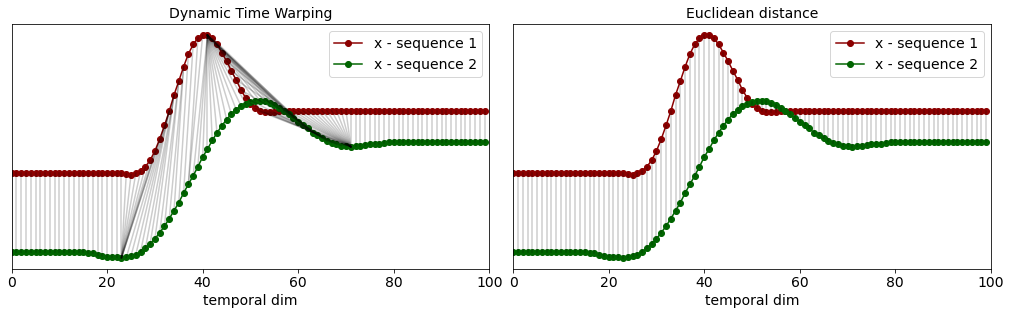

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
length = 20
path_idx = np.random.randint(2, 1600)
x_ref = paths[path_idx, 0, :]
x = paths[path_idx+2, 0, :]

path, similarity = dtw_path(x_ref, x)
x_tmp = x - 20

ax[0].plot(x_ref, color='darkred', linestyle='-', marker='o',  label='x - sequence 1')
ax[0].plot(x_tmp, color='darkgreen', linestyle='-', marker='o', label='x - sequence 2')
for idx, (i, j) in enumerate(path):
    ax[0].plot([i, j], [x_ref[i], x_tmp[j]], color='k', alpha=.2)
#ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('temporal dim')
ax[0].set_xlim([0, 100])
ax[0].set_title("Dynamic Time Warping")
ax[0].legend()

ax[1].plot(x_ref, color='darkred', linestyle='-', marker='o', label='x - sequence 1')
ax[1].plot(x_tmp, color='darkgreen', linestyle='-', marker='o', label = 'x - sequence 2')
ax[1].legend()
for idx in range(len(x_ref)):
    ax[1].plot([idx, idx], [x_ref[idx], x_tmp[idx]], color='k', alpha=.2)
#ax[1].set_xticks([])
ax[1].set_xlim([0, 100])
ax[1].set_yticks([])
ax[1].set_title("Euclidean distance")
ax[1].set_xlabel('temporal dim')


print('idx', path_idx)
print('Eucledian distance', np.linalg.norm(x_ref - x))
print('DTW similarity', similarity)

# set the spacing between subplots
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05)

plt.savefig('./figures/dtw_vs_euc.png', bbox_inches="tight")
plt.show()
